In [0]:
from fastai.vision import *
from fastai.widgets import *

# Data Preparation
## Download data

I will take advantage of amazing fastai `ImageDownloader` widget for jupyter notebook 

**warning**: 
- does not work in jupyter lab
- I think it is not completely stable, it may be necessary to restart the kernel for each class

In [0]:
path = './data' # where to store dowloaded data
n_images=150 # how many images per class
queries = ['cheetah acinonyx jubatus', 'leopard panthera pardus','jaguar panthera onca'] 
labels = ['cheetah', 'leopard','jaguar']

In [0]:
os.makedirs(path, exist_ok=True)

In [0]:
ImageDownloader(path)

In [0]:
ImageDownloader(path)

In [0]:
ImageDownloader(path)

In [0]:
queries

['cheetah acinonyx jubatus', 'leopard panthera pardus', 'jaguar panthera onca']

In [0]:
# let's rename directories
! mv -v data/cheetah* data/cheetah
! mv -v data/leopard* data/leopard
! mv -v data/jaguar* data/jaguar

data/cheetah acinonyx jubatus -> data/cheetah
data/leopard panthera pardus -> data/leopard
mv: rename data/jaguar to data/jaguar/jaguar: Invalid argument


## Prepare DataBunch 



In [4]:
#if using colab, move 'data' to drive and uncomment the following lines to load data from drive

from google.colab import drive
drive.mount('/content/drive') 
path = '/content/drive/My Drive/repos/feline_classifier/data' # I put data in colab/repos/feline_classifier/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
np.random.seed(22)
data = ImageDataBunch\
    .from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),
                 size=224, num_workers=0)\
    .normalize(imagenet_stats)

In [0]:
data.classes

['cheetah', 'jaguar', 'leopard']

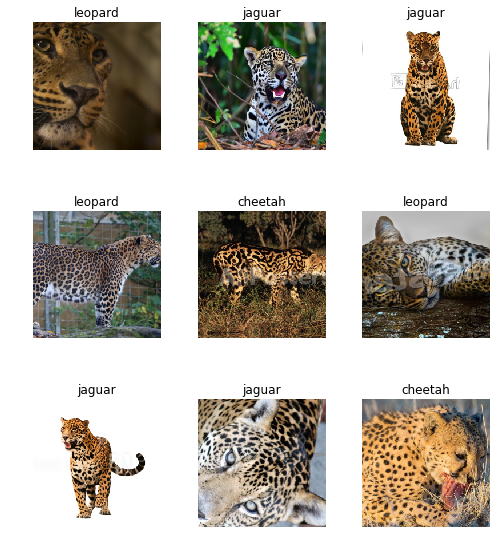

In [0]:
data.show_batch(rows=3, figsize=(7,8),)

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard'], 3, 480, 119)

# Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.175954,0.667344,0.302521,03:38
1,0.785592,0.253050,0.084034,03:26
2,0.587269,0.217643,0.075630,03:22
3,0.487022,0.215361,0.075630,03:20


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
#learn.lr_find()

In [0]:
#learn.recorder.plot()

In [0]:
#learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
#learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,leopard,leopard,leopard,leopard
Path: data;

Valid: LabelList (119 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jaguar,cheetah,jaguar,jaguar,leopard
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

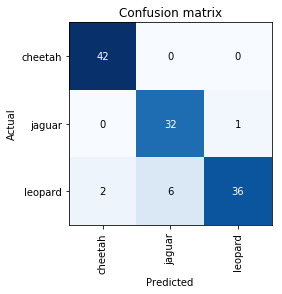

In [0]:
interp.plot_confusion_matrix()

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch(num_workers=0)
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (599 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,leopard,leopard,leopard,leopard
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
1+1

2